In [1]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [3]:
#Load the data 
df_english = pd.read_csv('sample_data/small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('sample_data/small_vocab_fr.csv', sep = '/t', names = ['french'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [4]:
df_english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [5]:
df_french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [6]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [7]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [8]:
df = pd.concat([df_english, df_french], axis = 1)

In [9]:
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [10]:
print('Total English records = {}'.format(len(df['english'])))
print('Total French records = {}'.format(len(df['french'])))

Total English records = 137860
Total French records = 137860


In [11]:
#Perform Data cleaning
#function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [12]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [13]:
english_words = []
french_words = []

In [14]:
def get_unique_words(x, word_list):
  for word in x.split():
    if word not in word_list:
      word_list.append(word)

df['english'].apply(lambda x: get_unique_words(x, english_words))   
df['french'].apply(lambda x: get_unique_words(x, french_words))   

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [15]:
english_words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'they',
 'pears',
 'she',
 'little',
 'red',

In [16]:
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 "l'orange",
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 "l'automne",
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'm

In [17]:
total_english_words = len(english_words)
total_english_words

199

In [18]:
total_french_words = len(french_words)
total_french_words

350

In [19]:
#visualize cleaned up data set

#obtain list of all words in the dataset 
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)

In [20]:
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [21]:
#Obtain the total count of words 
english_words_counts = Counter(words)
english_words_counts

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [22]:
#sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [23]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [24]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [25]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [26]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [27]:
#barplot using Plotly.express
fig = px.bar(x = english_words, y = english_counts)
fig.show()

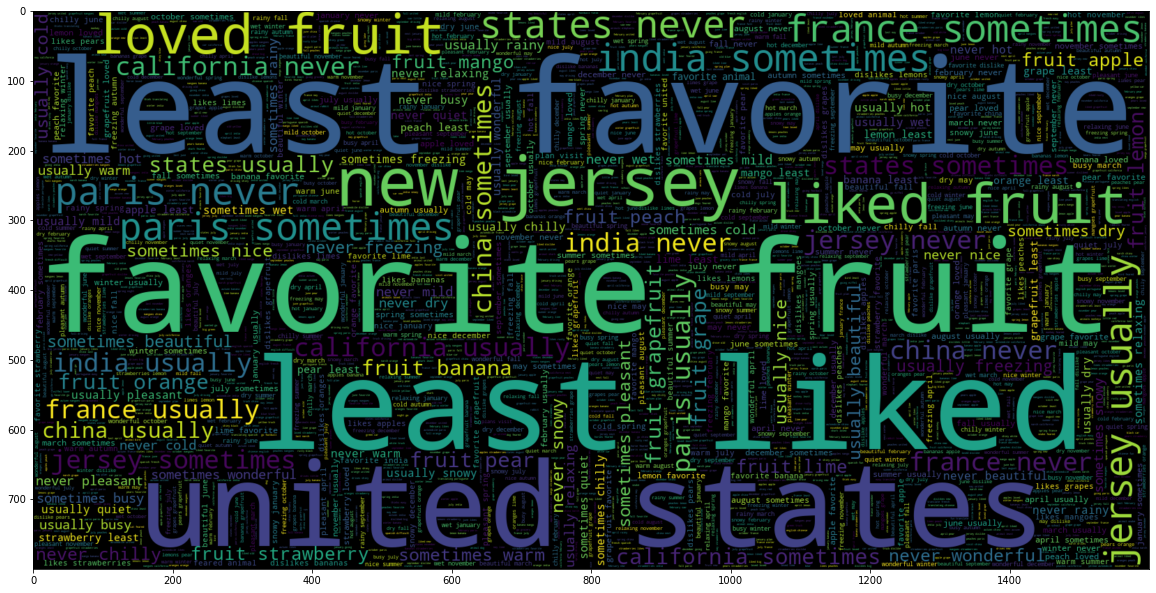

In [28]:
#Plotting the word cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [30]:
  #Maximum number of words in any sentence in the df['english] column

  maxlen_english = -1
  for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if (maxlen_english < len(tokens)):
      maxlen_english = len(tokens)
print('The maximum number of words in any document = ', maxlen_english)

The maximum number of words in any document =  15


In [31]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [32]:
french_words_counts = Counter(words)
french_words_counts

Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [33]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [34]:
# append the values to a list for visualization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()

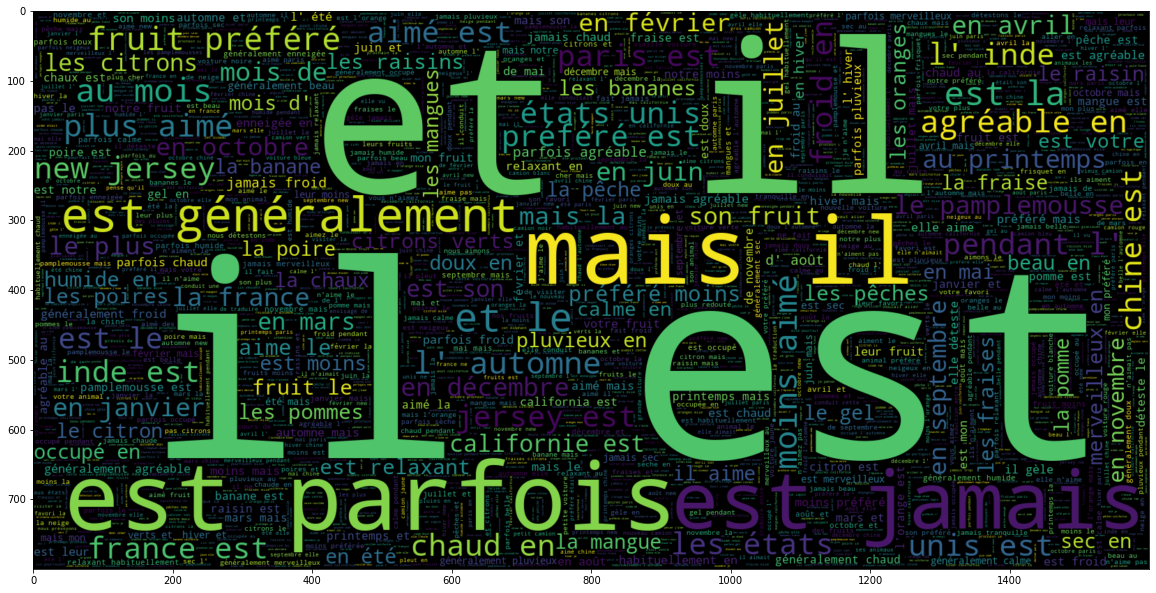

In [35]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [37]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)  

The maximum number of words in any document =  23


In [59]:
#Prepare the data by performing tokenization and padding 
def tokenize_and_pad(x, maxlen):
  # a tokenizer to tokenize words and create sequences of tokenized words 
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [60]:
#applying the function to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)

In [61]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [62]:
#Build and train the model 

english_vocab_size = total_english_words + 1
french_vocab_size = total_french_words + 1

#Sequential Model
model = Sequential()
#embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
#encoder
model.add(LSTM(256))
#decoder
#repeatvector repeats the input for a desired number of times to change 2D-array to 3D-array
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 256)           51200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 23, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [63]:
#change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [64]:
#train the model 
model.fit(x_train, y_train, batch_size=1024, validation_split=0.1, epochs = 20)

Epoch 1/20
110/110 [==============================] - 13s 76ms/step - loss: 3.4371 - accuracy: 0.4546 - val_loss: 2.1214 - val_accuracy: 0.5448
Epoch 2/20
110/110 [==============================] - 7s 64ms/step - loss: 2.0001 - accuracy: 0.5564 - val_loss: 1.6328 - val_accuracy: 0.5965
Epoch 3/20
110/110 [==============================] - 7s 63ms/step - loss: 1.5733 - accuracy: 0.6055 - val_loss: 1.3913 - val_accuracy: 0.6387
Epoch 4/20
110/110 [==============================] - 7s 64ms/step - loss: 1.3402 - accuracy: 0.6482 - val_loss: 1.2588 - val_accuracy: 0.6519
Epoch 5/20
110/110 [==============================] - 7s 63ms/step - loss: 1.1832 - accuracy: 0.6718 - val_loss: 1.0668 - val_accuracy: 0.6977
Epoch 6/20
110/110 [==============================] - 7s 64ms/step - loss: 1.0324 - accuracy: 0.7069 - val_loss: 0.9678 - val_accuracy: 0.7229
Epoch 7/20
110/110 [==============================] - 7s 64ms/step - loss: 0.9149 - accuracy: 0.7349 - val_loss: 0.8803 - val_accuracy: 0.743

In [65]:
#save the model 
model.save('weights.h5')

In [66]:
#Access the trained model performance 
x_test.shape

(13786, 15)

In [69]:
x_test

array([[ 17,  23,   1, ...,   2,  42,   0],
       [ 19,   1,   8, ...,  48,   0,   0],
       [ 50,  12,  11, ...,   0,   0,   0],
       ...,
       [ 50,  12,  16, ...,   5,  90,   0],
       [150,   1,  27, ...,   0,   0,   0],
       [ 18,   1,  52, ...,   0,   0,   0]], dtype=int32)

In [70]:
x_test[0]

array([17, 23,  1,  9, 65,  4, 47,  6,  3,  1, 10, 56,  2, 42,  0],
      dtype=int32)

In [71]:
y_predict = model.predict(x_test)

In [79]:
y_predict

array([[[3.85113008e-09, 9.99746703e-07, 1.97655847e-09, ...,
         1.48459001e-09, 1.03158093e-09, 8.10118916e-10],
        [1.31364546e-11, 8.47212796e-05, 5.06123225e-12, ...,
         1.01120492e-11, 7.09018217e-12, 2.30088409e-12],
        [1.50933113e-10, 9.99678731e-01, 1.43621962e-10, ...,
         1.11130263e-11, 7.78126088e-12, 4.34973281e-12],
        ...,
        [9.99928594e-01, 3.43315082e-06, 2.37441782e-05, ...,
         2.05668850e-11, 1.38364277e-11, 9.07215969e-12],
        [9.99931335e-01, 3.24427856e-06, 2.23110765e-05, ...,
         2.13691530e-11, 1.42629719e-11, 9.42489316e-12],
        [9.99935389e-01, 3.00964734e-06, 2.04432254e-05, ...,
         2.17350860e-11, 1.44133594e-11, 9.56603286e-12]],

       [[2.76596861e-08, 1.49277025e-06, 3.47241835e-09, ...,
         3.54297325e-09, 2.07418371e-09, 2.33701458e-09],
        [7.77579556e-10, 4.55806119e-04, 2.60506079e-11, ...,
         9.01247549e-11, 5.36680318e-11, 3.98696111e-11],
        [1.87565274e-09, 

In [74]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [80]:
def pad_to_text(padded, tokenizer):
  id_to_word = {id: word for word, id in tokenizer.word_index.items()}
  id_to_word[0] = ''
  return ' '.join([id_to_word[j] for j in padded])

In [81]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - new jersey is usually wet during december but it is never warm in september 

Original French word - new jersey est généralement humide en décembre mais il est jamais chaud en septembre         

Predicted French word - new jersey est généralement humide en décembre mais il est jamais chaud en septembre         




Original English word - india is sometimes freezing during march but it is usually busy in february  

Original French word - l' inde est parfois le gel en mars mais il est généralement occupé en février        

Predicted French word - l' inde est parfois le en en mais il est généralement généralement en février         




Original English word - their least favorite fruit is the grape        

Original French word - leur fruit préféré est moins le raisin                

Predicted French word - votre fruit préféré est est le raisin                




Original English word - california is quiet during june and it is usually freezing in may   

Or